# Sharing the Game of Life

Once your heroes journey is complete you are ready to begin the actual work: sharing your results. For unless someone can read and understand the story of your work it will vanish forever into the void. Rail against that ultimate fate by sharing your work.

We want to share our code in a way that others can make use of. In chasing this 
goal we find answers in creating our own type of object, or class within Python.
Before we get to that, let us specify what our 'final' code should look like. Our
code should be suitable for submission for scientific publication, or perhaps use
as an internal tool.

Let us set out some goals for how we should like to share our Game of Life code:

+ Must be clear to read, and follow standard formatting.
+ Must use 'best practices' where possible.

For our Game of Life we would also find some other features useful:
+ An easy display of a given simulation.
+ A history of a given simulation.
+ The ability to 'inject' or combine simulations.

In [1]:
import numpy as np
from numpy.random import default_rng
import cv2
from scipy.signal import convolve

rng = default_rng()

import matplotlib.pyplot as plt
%matplotlib inline

Here I demonstrate implementing a class which handles the game of life.

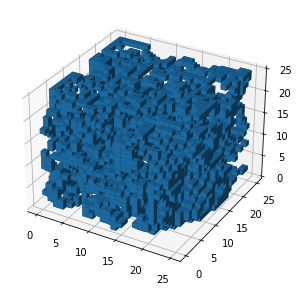

In [3]:
class GoLSimulation:

    def __init__(self, grid):
        self.grid = grid.astype(int)
        self.grid_history = list([grid])

    def step(self, x):
        conv_array = np.ones((3, 3, 3))
        nbrs_count = convolve(x, conv_array, mode='same') - x
        return ((nbrs_count >= 3) | (x & (nbrs_count >= 2))) & (nbrs_count <= 5)

    def simulate(self, n_iter:int):
        for _ in range(n_iter):
            new_grid = self.step(self.grid)
            self.grid_history.append(new_grid)
            self.grid = new_grid
        return self

    def _repr_png_(self):
        plt.figure(figsize=(5,5)).add_subplot(projection='3d').voxels(self.grid)


grid_3d = np.zeros((25, 25, 25))
random_pop = (rng.random(grid_3d.shape) > 0.95).astype(int)

gol_sim = GoLSimulation(grid=random_pop)
gol_sim = gol_sim.simulate(5)
gol_sim

In [1]:
# conv_array = np.array([
#     [[0, 0, 0], [0, 1, 0], [0, 0, 0]],
#     [[0, 1, 0], [1, 1, 1], [0, 1, 0]],
#     [[0, 0, 0], [0, 1, 0], [0, 0, 0]],
# ])

# plt.figure(figsize=(5,5)).add_subplot(projection='3d').voxels(conv_array);

That is not too much new code, I included a stage history so that we can observe intermediate stages.

Now, let's get something that is interesting for a general audience to look at. Here I make some voxel text.

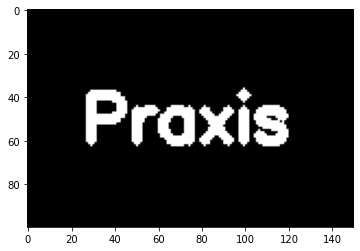

In [4]:
image = np.zeros((100, 150, 3), np.uint8)

position = (25, 60)

cv2.putText(image, "Praxis",
            position,
            cv2.FONT_HERSHEY_SIMPLEX, #font family
            1, #font size
            (255, 255, 255, 255), #font color
            3)
plt.imshow(image)

Let's turn that into a 3d array. To begin, we know that our voxels only require one dimension. So we can remove the color information.

In [5]:
image.shape

(100, 150, 3)

Then we can change anything over zero into a one.

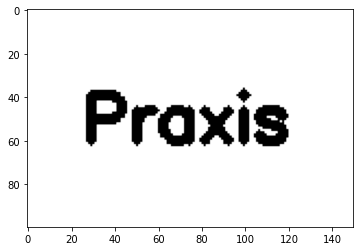

In [6]:
text_image = (image[:, :, 0] > 0).astype(int)
plt.imshow(text_image, cmap='Greys')

Now I create a grid of zeros large enough to contain our text, then I update a few of the middle most slices to include our text.

In [7]:
text_image.shape

(100, 150)

In [8]:
text_grid = np.zeros((text_image.shape[0], text_image.shape[1], 16))
for idx in range(7, 8):
    text_grid[:, :, idx] += text_image

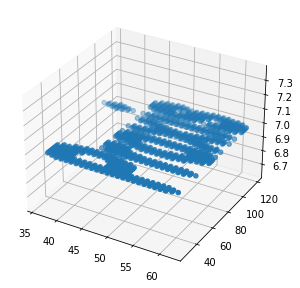

In [9]:
coords = np.argwhere(text_grid)
plt.figure(figsize=(5,5)).add_subplot(projection='3d').scatter(
    coords[:, 0], coords[:, 1], coords[:, 2])

Wonderful, we now have some interesting text at the start of our simulation. Let's see what happens.

CPU times: user 599 ms, sys: 44 ms, total: 643 ms
Wall time: 88 ms


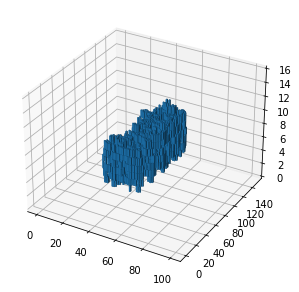

In [10]:
%%time
gol_sim = GoLSimulation(grid=text_grid)
gol_sim = gol_sim.simulate(3)
gol_sim

We can also now access the history of this simulation.

In [11]:
gol_sim.grid_history[-1].shape

(100, 150, 16)